# template day note notebook for Ruobing's task

In [1]:
%matplotlib inline
import os     # for getting file paths
import neo    # for reading neural data (TDT format)
import dg2df  # for reading behavioral data
import pandas as pd
import re     # use regular expression to find file names
import numpy as np
import scipy as sp

import misc_tools
import signal_align
import data_load_DLSH
import matplotlib as mpl
import matplotlib.pyplot as plt
import df_ana
import PyNeuroAna as pna
import PyNeuroPlot as pnp
import data_load_DLSH
import GM32_layout
mpl.style.use('ggplot')

## Load data

In [2]:
# Data path settings
dir_tdt_tank = '/shared/lab/projects/encounter/data/TDT/' # Neural data (TDT)
dir_dg = '/shared/lab/projects/analysis/ruobing/data_dg' # Task parameters / behavior data
keyword_tank = '.*Dexter.*GM32-171016.*' # Tank name (common)
keyword_blk = '.*featureMTS' # Task name

In [3]:
# Load data
[blk, data_df, name_tdt_blocks] = data_load_DLSH.load_data(
    keyword_blk, keyword_tank,
    dir_tdt_tank=dir_tdt_tank, dir_dg=dir_dg,
    tf_interactive=False, tf_verbose=True)

filename_common = misc_tools.str_common(name_tdt_blocks)

data_df = data_load_DLSH.standardize_data_df(data_df, filename_common)
blk     = data_load_DLSH.standardize_blk(blk)

ts_StimOn = data_load_DLSH.get_ts_align(blk, data_df, dg_tos_align='stimon') # Stimons in the TDT clock


the following tdt blockes are selected: ['x_featureMTS_101617002', 'x_featureMTS_101617003', 'x_featureMTS_101617004', 'x_featureMTS_101617005', 'x_featureMTS_101617006', 'x_featureMTS_101617007', 'x_featureMTS_101617008', 'x_featureMTS_101617009']
the following dg files are selected: ['x_featureMTS_101617002', 'x_featureMTS_101617003', 'x_featureMTS_101617004', 'x_featureMTS_101617005', 'x_featureMTS_101617006', 'x_featureMTS_101617007', 'x_featureMTS_101617008', 'x_featureMTS_101617009', 'x_featureMTS_101717002', 'x_featureMTS_101717003', 'x_featureMTS_101717004', 'x_featureMTS_101717005', 'x_featureMTS_101717006', 'x_featureMTS_101717007', 'x_featureMTS_101717008', 'x_featureMTS_101717009', 'x_featureMTS_101717010', 'x_featureMTS_101717013', 'x_featureMTS_101817002', 'x_featureMTS_101817003', 'x_featureMTS_101817004', 'x_featureMTS_101817005', 'x_featureMTS_101817006', 'x_featureMTS_101817007', 'x_featureMTS_101817008', 'x_featureMTS_101817011', 'x_featureMTS_101817012', 'x_featureM

## Basics - ERP & PSTH & Tuning

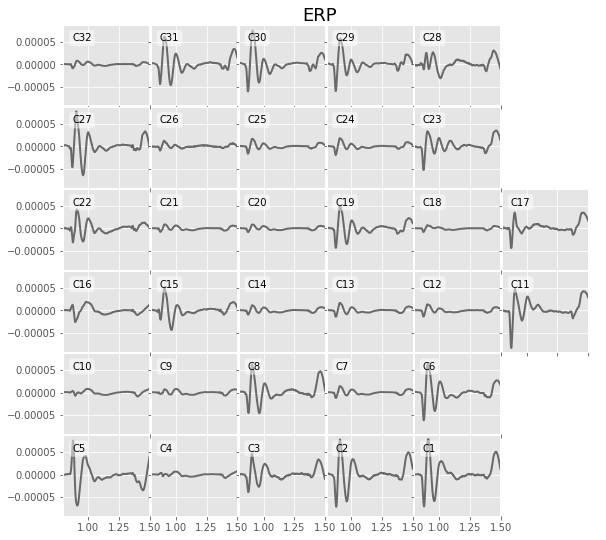

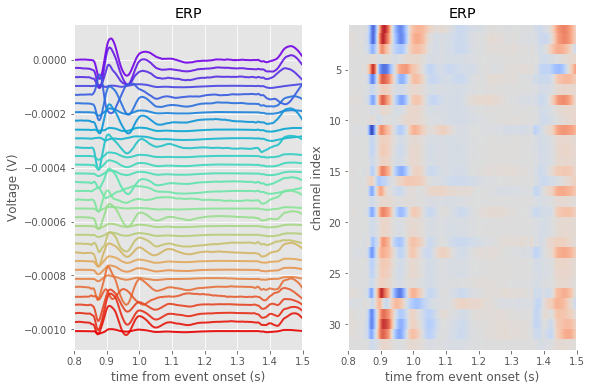

In [31]:
# ERPs of all channels
window_offset = [0.80, 1.50] # Time window to show
# Realign LFP data to stim-on events
data_neuro=signal_align.blk_align_to_evt(blk, ts_StimOn, window_offset, 
                                         type_filter='ana.*', name_filter='LFP.*', 
                                         spike_bin_rate=1000)

# ERPs with array positions
temp = pnp.ErpPlot(data_neuro, data_neuro['ts'], array_layout=GM32_layout.layout_GM32)
# ERPs without position
temp = pnp.ErpPlot(data_neuro, data_neuro['ts'])

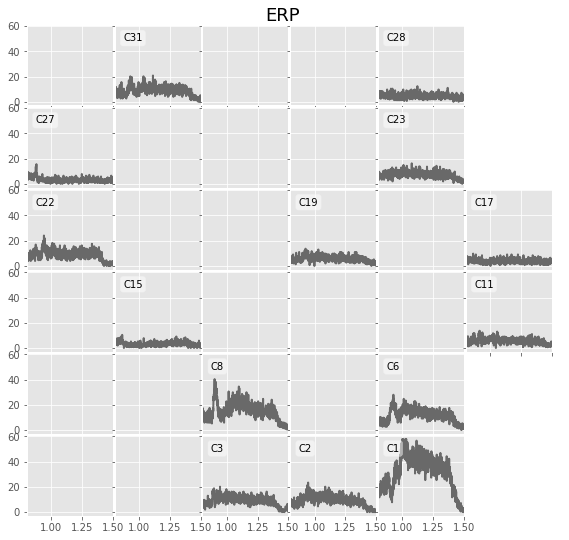

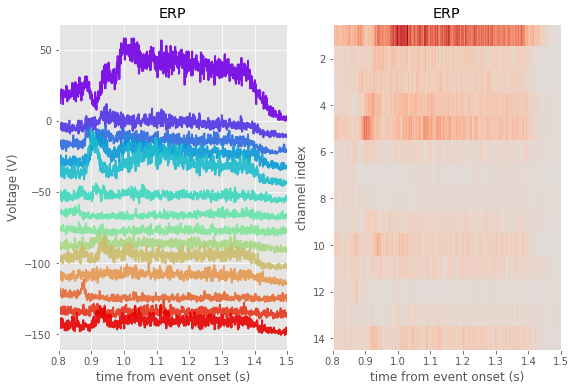

In [32]:
# PSTHs of all channels
window_offset = [0.80, 1.50] # Time window to show
# Realign spike data to stim-on events
data_neuro=signal_align.blk_align_to_evt(blk, ts_StimOn, window_offset,
                                         type_filter='spiketrains.*', 
                                         name_filter='.*Code[1-9]$', spike_bin_rate=1000)

# PSTHs with array positions
temp = pnp.ErpPlot(data_neuro, data_neuro['ts'], array_layout=GM32_layout.layout_GM32)
# PSTHs without position
temp = pnp.ErpPlot(data_neuro, data_neuro['ts'])

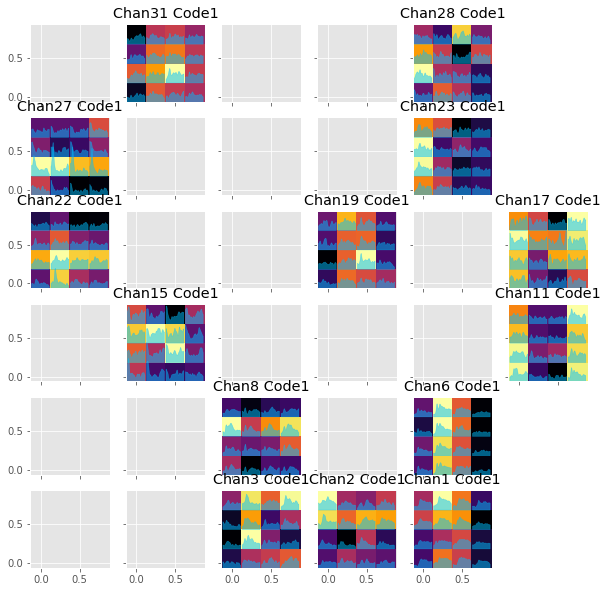

In [33]:
# Plot tuning properties for each channel

data_to_use = 'spk' # two data sources: spk or lfp
window_offset = [0.8, 1.4] # Time Window to show
window_RF = [0.85, 1.2] # Time window to calculate tuning properties

# Realign data to stim-on events
if data_to_use == 'spk':
    data_neuro=signal_align.blk_align_to_evt(blk, ts_StimOn, window_offset,
                                             type_filter='spiketrains.*', 
                                             name_filter='.*Code[1-9]$', spike_bin_rate=1000)
else:
    data_neuro=signal_align.blk_align_to_evt(blk, ts_StimOn, window_offset,
                                             type_filter='analogsignals.*', name_filter='.*LFPs.*')
# Get the number of channels
num_signals = len(data_neuro['signal_info'])

# Define tuning dimensions, 0 = orientation 1 = color
data_df['tuning0'] = data_df['ProbeOrientation']/180
data_df['tuning1'] = data_df['ProbeColor']/np.pi/2

# Sort the aligned data by tuning dimensions
data_neuro = signal_align.neuro_sort(data_df, ['tuning0','tuning1'], [], data_neuro)

# Plot tunings
h_fig, h_axes = pnp.create_array_layout_subplots(GM32_layout.layout_GM32)
h_fig.set_size_inches([10,10])
for i_signal in range(num_signals): # for each channel
    index_chan = data_neuro['signal_info']['channel_index'][i_signal]
    plt.axes(h_axes[index_chan-1])
    pnp.RfPlot(data_neuro, sk_std=0.02, indx_sgnl=i_signal, t_focus=window_RF)
    signal_name = data_neuro['signal_info'][i_signal]['name']
    plt.axis('equal')
    plt.title('{}'.format(signal_name))



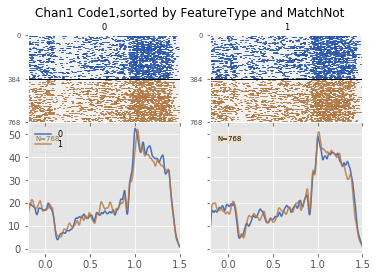

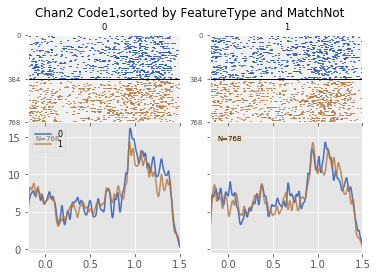

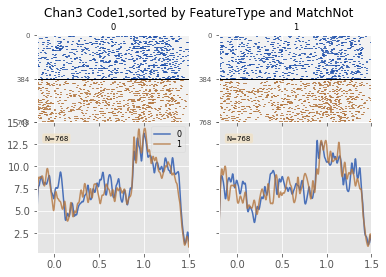

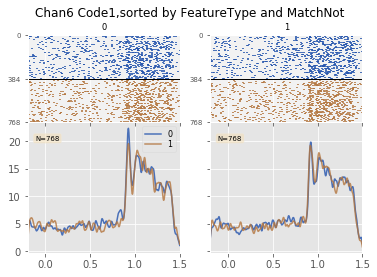

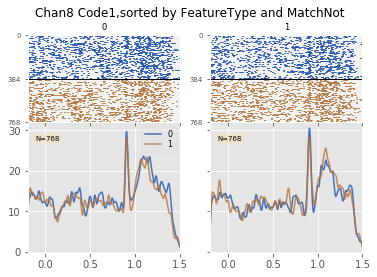

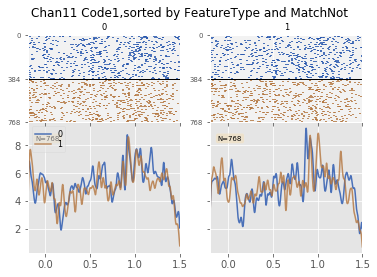

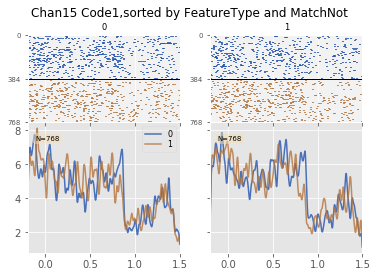

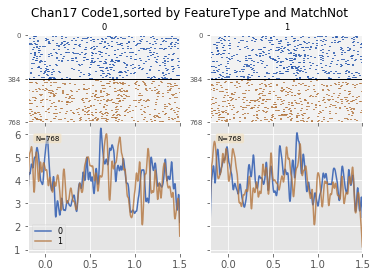

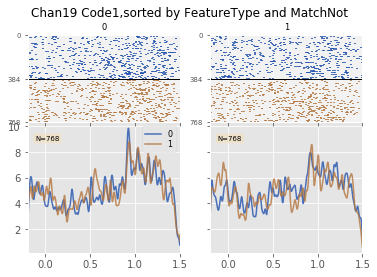

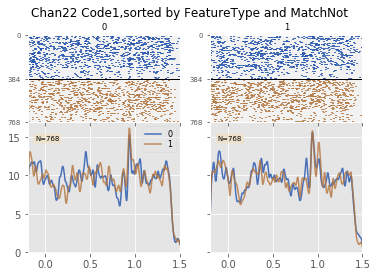

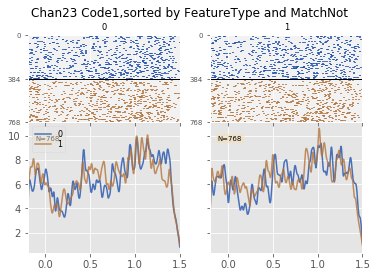

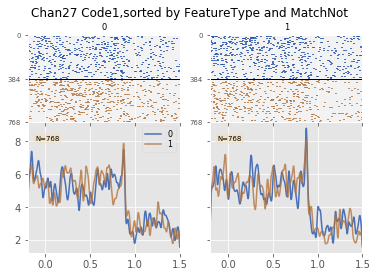

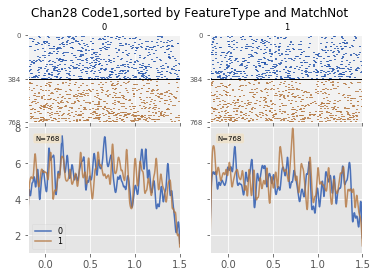

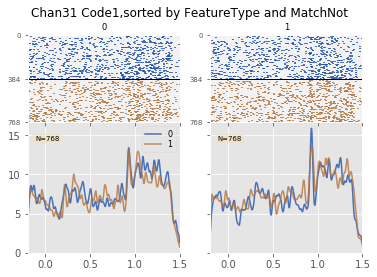

In [36]:
# Sort by task conditions
window_offset = [-0.20, 1.500] # Time window to show
# Realign data to stim-on events
data_neuro=signal_align.blk_align_to_evt(blk, ts_StimOn, window_offset,
                                         type_filter='spiketrains.*', 
                                         name_filter='.*Code[1-9]$', spike_bin_rate=1000)
grpby1 = 'FeatureType'
grpby2 = 'MatchNot'
df_group = df_ana.DfGroupby(data_df, groupby=grpby, tf_aggregate=False)

for i_signal in range(len(data_neuro['signal_info'])):
    signal_name = data_neuro['signal_info'][i_signal]['name']
    h_fig, h_axes = pnp.CreateSubplotFromGroupby(df_group['order'], tf_title=False)
    tf_legend = True
    for cdtn in df_group['idx']:
        plt.axes(h_axes[cdtn])
        pnp.PsthPlot(data_neuro['data'][:, :, i_signal], ts=data_neuro['ts'],
                     cdtn=data_df[grpby2], limit=df_group['idx'][cdtn], sk_std=0.010,
                     tf_legend=tf_legend)
        tf_legend = False
        plt.title(cdtn, fontsize='small')
    plt.suptitle('{}, type'.format(signal_name, ))
    plt.show()
    plt.close('all')